<a href="https://colab.research.google.com/github/jiwoo1004/python/blob/main/%EC%8B%AC%EC%9E%A5%EB%B3%91_%EB%B0%9C%EB%B3%91_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from google.colab import files
myfile = files.upload()
df = pd.read_csv('heart disease classification dataset.csv')

df.isnull().sum().sort_values(ascending=False).head(20)

Saving heart disease classification dataset.csv to heart disease classification dataset (3).csv


thalach       5
trestbps      4
chol          1
Unnamed: 0    0
age           0
sex           0
cp            0
fbs           0
restecg       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [ ]:
df.loc[:,['thalach','trestbps','chol']] = pd.get_dummies(df.loc[:,['thalach','trestbps','chol']])

df.loc[:,['thalach','trestbps','chol']] = df.loc[:,['thalach','trestbps','chol']].fillna(df.loc[:,['thalach','trestbps','chol']].mean())

df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.000000,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.000000,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.000000,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,131.712375,131.0,0,1,115.0,1,1.2,1,1,3,no


In [ ]:
df.iloc[:,2] = pd.get_dummies(df.iloc[:,2])
df.iloc[:,14] = pd.get_dummies(df.iloc[:,14])
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,0,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,0
1,1,37,0,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,0
2,2,41,1,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,0
3,3,56,0,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,0
4,4,57,1,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,1,0,140.000000,241.0,0,1,123.0,1,0.2,1,0,3,1
299,299,45,0,3,110.000000,264.0,0,1,132.0,0,1.2,1,0,3,1
300,300,68,0,0,144.000000,193.0,1,1,141.0,0,3.4,1,2,3,1
301,301,57,0,0,131.712375,131.0,0,1,115.0,1,1.2,1,1,3,1


In [ ]:
normalization_df = (df - df.mean())/df.std()

normalization_df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-1.723493,0.950624,-0.679881,1.969864,7.587772e-01,-0.256991,2.390484,-1.004171,0.005999,-0.69548,1.085542,-2.270822,-0.713249,-2.145324,-0.913019
1,-1.712079,-1.912150,-0.679881,1.000921,-9.778352e-02,0.071053,-0.416945,0.897478,1.659547,-0.69548,2.119067,-2.270822,-0.713249,-0.512075,-0.913019
2,-1.700665,-1.471723,1.465992,0.031978,-9.778352e-02,-0.816596,-0.416945,-1.004171,0.989190,-0.69548,0.310399,0.974740,-0.713249,-0.512075,-0.913019
3,-1.689251,0.179877,-0.679881,0.031978,-6.688240e-01,-0.199101,-0.416945,0.897478,1.257333,-0.69548,-0.206364,0.974740,-0.713249,-0.512075,-0.913019
4,-1.677837,0.289984,1.465992,-0.936965,-1.622995e-15,2.077912,-0.416945,0.897478,0.586975,1.43311,-0.378618,0.974740,-0.713249,-0.512075,-0.913019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.677837,0.289984,1.465992,-0.936965,4.732569e-01,-0.102618,-0.416945,0.897478,-1.200645,1.43311,-0.723126,-0.648041,-0.713249,1.121174,1.091653
299,1.689251,-1.031296,-0.679881,1.969864,-1.239864e+00,0.341207,-0.416945,0.897478,-0.798430,-0.69548,0.138144,-0.648041,-0.713249,1.121174,1.091653
300,1.700665,1.501157,-0.679881,-0.936965,7.016731e-01,-1.028860,2.390484,0.897478,-0.396216,-0.69548,2.032940,-0.648041,1.242538,1.121174,1.091653
301,1.712079,0.289984,-0.679881,-0.936965,-1.622995e-15,-2.225257,-0.416945,0.897478,-1.558169,1.43311,0.138144,-0.648041,0.264644,1.121174,1.091653


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                140       
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 30)                330       
                                                                 
 dropout_9 (Dropout)         (None, 30)                0         
                                                                 
 dense_18 (Dense)            (None, 40)                1240      
                                                                 
 dense_19 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,751
Trainable params: 1,751
Non-traina

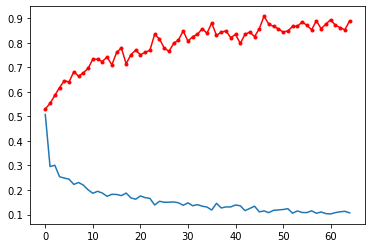

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

RANDOM_SEED = 3
np.random.seed(RANDOM_SEED)
x=normalization_df.iloc[:,1:14]

y=df.iloc[:,14]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=3)

model = Sequential()
model.add(Dense(10,  input_dim=13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(40,  activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath="./data/model/Ch15-house.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(x_train, y_train, epochs=2000, batch_size=30, validation_split=0.2, callbacks=[early_stopping_callback, checkpointer])

loss = model.evaluate(x_train,y_train)
print('accuracy:',loss)

y_loss = history.history['loss']
y_accu = history.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss)
plt.plot(x_len,y_accu, marker='.', c="red")

plt.show()


In [ ]:
history = model.fit(x_test, y_test, epochs= 200, batch_size=30)
loss = model.evaluate(x_test,y_test)
print('accuracy:',loss)

Epoch 1/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1232 - accuracy: 0.8387
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1152 - accuracy: 0.8387
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 0.1448 - accuracy: 0.7742
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 0.1290 - accuracy: 0.8065
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0965 - accuracy: 0.8710
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 0.1127 - accuracy: 0.8710
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 0.1122 - accuracy: 0.8387
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 0.1335 - accuracy: 0.8065
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 0.1457 - accuracy: 0.8065
Epoch 10/200
2/2 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.8710
Epoch 11/200
2/2 [===========

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                140       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                                 
 dense_21 (Dense)            (None, 30)                330       
                                                                 
 dropout_11 (Dropout)        (None, 30)                0         
                                                                 
 dense_22 (Dense)            (None, 40)                1240      
                                                                 
 dense_23 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,751
Trainable params: 1,751
Non-traina

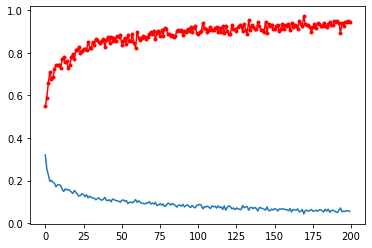

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                140       
                                                                 
 dropout_12 (Dropout)        (None, 10)                0         
                                                                 
 dense_25 (Dense)            (None, 30)                330       
                                                                 
 dropout_13 (Dropout)        (None, 30)                0         
                                                                 
 dense_26 (Dense)            (None, 40)                1240      
                                                                 
 dense_27 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,751
Trainable params: 1,751
Non-traina

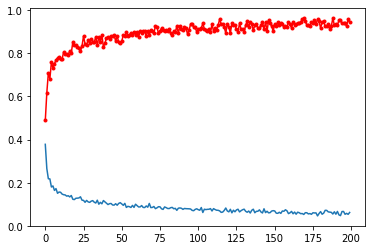

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                140       
                                                                 
 dropout_14 (Dropout)        (None, 10)                0         
                                                                 
 dense_29 (Dense)            (None, 30)                330       
                                                                 
 dropout_15 (Dropout)        (None, 30)                0         
                                                                 
 dense_30 (Dense)            (None, 40)                1240      
                                                                 
 dense_31 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,751
Trainable params: 1,751
Non-traina

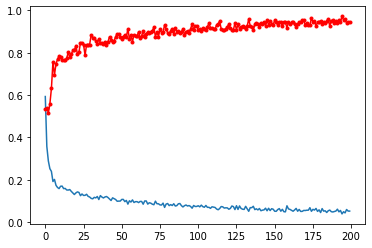

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                140       
                                                                 
 dropout_16 (Dropout)        (None, 10)                0         
                                                                 
 dense_33 (Dense)            (None, 30)                330       
                                                                 
 dropout_17 (Dropout)        (None, 30)                0         
                                                                 
 dense_34 (Dense)            (None, 40)                1240      
                                                                 
 dense_35 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,751
Trainable params: 1,751
Non-traina

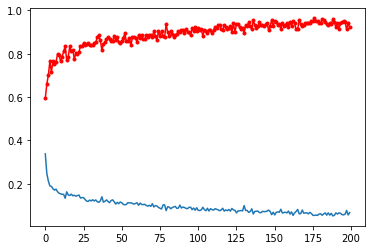

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                140       
                                                                 
 dropout_18 (Dropout)        (None, 10)                0         
                                                                 
 dense_37 (Dense)            (None, 30)                330       
                                                                 
 dropout_19 (Dropout)        (None, 30)                0         
                                                                 
 dense_38 (Dense)            (None, 40)                1240      
                                                                 
 dense_39 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,751
Trainable params: 1,751
Non-traina

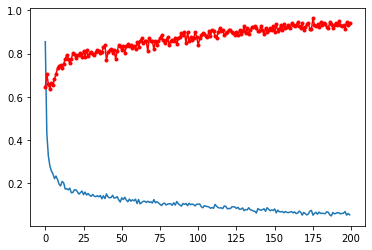

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                140       
                                                                 
 dropout_20 (Dropout)        (None, 10)                0         
                                                                 
 dense_41 (Dense)            (None, 30)                330       
                                                                 
 dropout_21 (Dropout)        (None, 30)                0         
                                                                 
 dense_42 (Dense)            (None, 40)                1240      
                                                                 
 dense_43 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,751
Trainable params: 1,751
Non-train

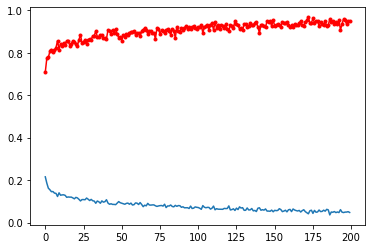

In [ ]:
from sklearn.model_selection import KFold

n_fold=6
skf=KFold(n_splits=n_fold, shuffle=True, random_state=3)

for train, test in skf.split(x,y) :
  x=normalization_df.iloc[:,1:14]

  y=df.iloc[:,14]

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=3)
  model = Sequential()
  model.add(Dense(10,  input_dim=13, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(30,  activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(40,  activation='relu'))
  model.add(Dense(1))
  model.summary()
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  history = model.fit(x_train, y_train, epochs=200, batch_size=30, validation_split=0.2)
  loss = model.evaluate(x_train,y_train)
  print('accuracy:',loss)

  y_loss = history.history['loss']
  y_accu = history.history['accuracy']

  x_len = np.arange(len(y_loss))

  plt.plot(x_len,y_loss)
  plt.plot(x_len,y_accu, marker='.', c="red")

  plt.show()


In [ ]:
history = model.fit(x_test, y_test, epochs= 200, batch_size=30)
loss = model.evaluate(x_test,y_test)
print('accuracy:',loss)